What are some major differences between the North American, European, and Japanese video game markets?

What video game genres are trending in each market?

What features about a video game are most indicative of its success?



Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [3]:
import pandas as pd
vgsales = pd.read_csv('vgsales.txt')
print(vgsales.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(vgsales, title='Pandas Profiling Report')
profile.to_file(output_file='vgsales.html')

In [6]:
print(len(vgsales))
vgsales = vgsales.dropna()
print(len(vgsales))

16598
16291


In [7]:
vgsales_NA = vgsales[vgsales['NA_Sales']!= 0]
vgsales_EU = vgsales[vgsales['EU_Sales']!= 0]
vgsales_JP = vgsales[vgsales['JP_Sales']!= 0]

print(len(vgsales_NA))
print(len(vgsales_EU))
print(len(vgsales_JP))

11861
10667
6084


<AxesSubplot:>

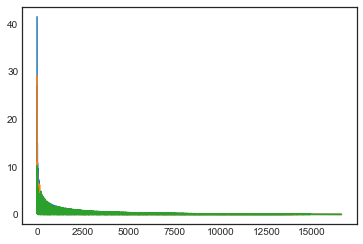

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-white')

In [20]:
def df_transform(df, col, time_col):
    df_out = df.groupby([time_col,col])['Name'].count()
    df_out = df_out.reset_index()
    df_out['count'] = df_out['Name']
    df_out.drop(columns=['Name'], inplace = True)
    return df_out

In [ ]:
def plot_trends(df, col, time_col, lst=None):
    if lst is None:
        df=df
    else:
        lst = lst
        df = df[df[col].isin(lst)]

    fig, ax = plt.subplots()
    for key, data in df.groupby(col):
        data.plot(x=time_col, y='count',ax = ax, label=key, rot = 90)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
          fancybox=True, shadow=True, ncol=5)
    plt.show()

*Platform Analysis*

In [23]:
NA = df_transform(vgsales_NA, 'Platform', 'Year')
plot_trends(NA, 'Platform', 'Year', lst=None)

     Year Platform  count
0  1980.0     2600      9
1  1981.0     2600     46
2  1982.0     2600     36
3  1983.0     2600     11
4  1983.0      NES      6


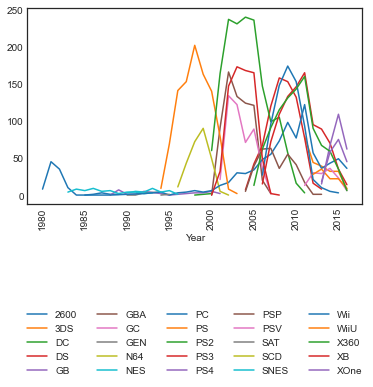

In [24]:
EU = df_transform(vgsales_EU, 'Platform', 'Year')
plot_trends(EU, 'Platform', 'Year', lst=None)

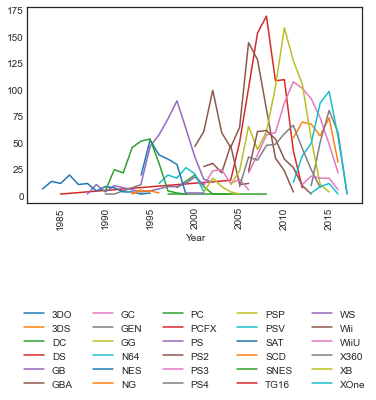

In [25]:
JP = df_transform(vgsales_JP, 'Platform', 'Year')
plot_trends(JP, 'Platform', 'Year', lst=None)